In [6]:
from itertools import product
from itertools import combinations

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [7]:
#results_csv_file_path = "RESULTS_NSTEVENS_CumCondCount=89844_2024-01-16.csv"
results_csv_file_path = "RESULTS_BLCKMRKT_CumCondCount=16_2024-01-17.csv"

response = pd.read_csv(f"~/Downloads/exp1/{results_csv_file_path}")
response


,Prev.Length,Match.Score,Tile.Size,Prev.Type,Browse.Time
0,55,50,0.2,TT,16.579823
1,55,80,0.2,TT,10.763616
2,55,50,0.2,AC,23.264087
3,55,80,0.2,AC,15.991807
4,55,50,0.4,TT,17.032202
...,...,...,...,...,...
1595,95,80,0.2,AC,20.427475
1596,95,50,0.4,TT,14.586407
1597,95,80,0.4,TT,14.343198
1598,95,50,0.4,AC,19.429247


In [8]:


# Rename the columns so that you can use the dataframe in linear regression analysis
response = response.rename(
    columns={
        column : column.split(".")[1] for column in response.columns
    }
)
response.columns
response.sort_values(by=['Time']).head(20)


,Length,Score,Size,Type,Time
369,55,80,0.2,TT,9.151320
81,55,80,0.2,TT,9.337022
693,55,80,0.4,TT,9.989945
1041,55,80,0.2,TT,10.073641
1073,55,80,0.2,TT,10.103900
549,55,80,0.4,TT,10.242189
449,55,80,0.2,TT,10.245571
197,55,80,0.4,TT,10.255869
229,55,80,0.4,TT,10.277155
373,55,80,0.4,TT,10.339103


In [9]:
import statsmodels.formula.api as smf

model = smf.ols('Time ~ C(Size) * C(Score) * C(Length) * C(Type)', data = response).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Time   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     1127.
Date:                Wed, 17 Jan 2024   Prob (F-statistic):               0.00
Time:                        11:05:00   Log-Likelihood:                -2234.9
No. Observations:                1600   AIC:                             4502.
Df Residuals:                    1584   BIC:                             4588.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
Intercept                                                      22.4365      0.098    228.239      0.000      22.244      22.629
C(Size)[T.0.4]                                                 -0.0086      0.139     -0.062      0.951      -0.281       0.264
C(Score)[T.80]                                                 -5.7283      0.139    -41.205      0.000      -6.001      -5.456
C(Length)[T.95]                                                -2.0421      0.139    -14.689      0.000      -2.315      -1.769
C(Type)[T.TT]                                                  -5.0041      0.139    -35.995      0.000      -5.277      -4.731
C(Size)[T.0.4]:C(Score)[T.80]                                   0.0177      0.197      0.090      0.928      -0.368       0.403
C(Size)[T.0.4]:C(Length)[T.95]                                 -0.0515      0.197     -0.262      0.794      -0.437       0.334
C(Score)[T.80]:C(Length)[T.95]                                  4.9827      0.197     25.344      0.000       4.597       5.368
C(Size)[T.0.4]:C(Type)[T.TT]                                    0.0608      0.197      0.309      0.757      -0.325       0.446
C(Score)[T.80]:C(Type)[T.TT]                                    0.2080      0.197      1.058      0.290      -0.178       0.594
C(Length)[T.95]:C(Type)[T.TT]                                  -0.1185      0.197     -0.603      0.547      -0.504       0.267
C(Size)[T.0.4]:C(Score)[T.80]:C(Length)[T.95]                   0.0786      0.278      0.283      0.777      -0.467       0.624
C(Size)[T.0.4]:C(Score)[T.80]:C(Type)[T.TT]                    -0.0095      0.278     -0.034      0.973      -0.555       0.536
C(Size)[T.0.4]:C(Length)[T.95]:C(Type)[T.TT]                    0.2163      0.278      0.778      0.437      -0.329       0.762
C(Score)[T.80]:C(Length)[T.95]:C(Type)[T.TT]                   -0.1714      0.278     -0.617      0.538      -0.717       0.374
C(Size)[T.0.4]:C(Score)[T.80]:C(Length)[T.95]:C(Type)[T.TT]    -0.3327      0.393     -0.846      0.398      -1.104       0.439
==============================================================================
Omnibus:                        3.848   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.146   Jarque-Bera (JB):                3.440
Skew:                           0.047   Prob(JB):                        0.179
Kurtosis:                       2.794   Cond. No.                         47.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
from scipy import stats

two = response[response["Size"] == 0.2]["Time"]
four = response[response["Size"] == 0.4]["Time"]

## check if sign dif mean time

t = np.var(two, ddof = 1)/np.var(four, ddof = 1)
print("t =", t)

pv = stats.f.cdf(t, dfn=799, dfd=799) + 1 - stats.f.cdf(1/t, dfn=799, dfd=799)
print("p-value =", pv)


## Not significantly different

t = 1.0255474169166936
p-value = 1.2784722826550294


In [11]:

t, pv = stats.ttest_ind(two, four, equal_var = True, alternative = 'greater')
print("t =", t)
print("p-value =", pv)

t = -0.20738946902798172
p-value = 0.5821339346743041


In [28]:
## Tile Size not needed in model

import statsmodels.formula.api as smf
import statsmodels.api as sm
model_noint = smf.ols('Time ~ C(Size)+ C(Score) + C(Length) + C(Type)', data = response).fit()

model_nosize = smf.ols('Time ~  C(Score) + C(Length) + C(Type)', data = response).fit()
sm.stats.anova_lm(model_nosize, model_noint)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,1596.0,3895.111648,0.0,NaN,NaN,NaN
1,1595.0,3894.630795,1.0,0.480853,0.196928,0.657272


In [29]:
# Interactions are good

model_nosize_wint = smf.ols('Time ~ C(Score) * C(Length) * C(Type)', data = response).fit()
model_noint = smf.ols('Time ~ C(Score) + C(Length) + C(Type)', data = response).fit()
sm.stats.anova_lm(model_noint, model_nosize_wint)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,1596.0,3895.111648,0.0,NaN,NaN,NaN
1,1592.0,1533.661208,4.0,2361.45044,612.819357,2.959947e-320


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Time   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     4228.
Date:                Wed, 17 Jan 2024   Prob (F-statistic):               0.00
Time:                        15:23:45   Log-Likelihood:                -2239.6
No. Observations:                1600   AIC:                             4489.
Df Residuals:                    1595   BIC:                             4516.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         22.4262      0.055    408.294      0.000      22.318      22.534
C(Score)[T.80]                    -5.6178      0.069    -80.859      0.000      -5.754      -5.482
C(Length)[T.95]                   -2.0730      0.069    -29.837      0.000      -2.209      -1.937
C(Type)[T.TT]                     -4.9616      0.049   -100.994      0.000      -5.058      -4.865
C(Score)[T.80]:C(Length)[T.95]     4.8531      0.098     49.393      0.000       4.660       5.046
==============================================================================
Omnibus:                        3.693   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.158   Jarque-Bera (JB):                3.320
Skew:                           0.047   Prob(JB):                        0.190
Kurtosis:                       2.797   Cond. No.                         7.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

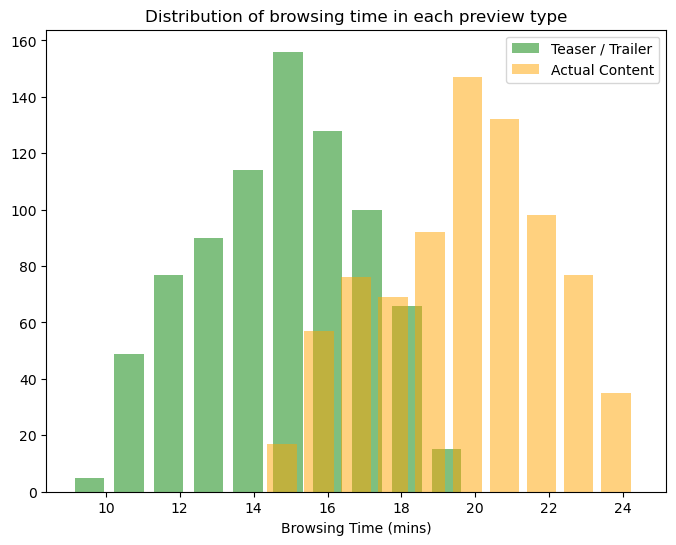

In [23]:
fig, ax = plt.subplots(figsize=(8, 6))

teaser_trailer = response[response['Type'] == 'TT']
actual_content = response[response['Type'] == 'AC']
ax.hist(teaser_trailer.Time, width=0.8, color='green', alpha=0.5, label='Teaser / Trailer')
ax.hist(actual_content.Time, width=0.8, color='orange', alpha=0.5, label='Actual Content')
ax.set_xlabel("Browsing Time (mins)")
ax.set_title("Distribution of browsing time in each preview type")
ax.legend()
plt.show()

In [12]:
TT = response[response["Type"] == "TT"]["Time"]
AC = response[response["Type"] != "TT"]["Time"]

800

In [13]:

## check if TT sign better than AC mean time

t = np.var(TT, ddof = 1)/np.var(AC, ddof = 1)
print("t =", t)

pv = stats.f.cdf(t, dfn=799, dfd=799) + 1 - stats.f.cdf(1/t, dfn=799, dfd=799)
print("p-value =", pv)


t = 0.9383576824641993
p-value = 0.36872685294801444


In [14]:
t, pv = stats.ttest_ind(TT, AC, equal_var = False, alternative = 'greater')
print("t =", t)
print("p-value =", pv)

t = -44.2983518140121
p-value = 1.0


In [17]:
## 90th percentile

TTQ= TT[TT <= TT.quantile(0.9)]
ACQ= AC[AC >= AC.quantile(0.9)]


14.43927690866418

In [18]:
t = np.var(TTQ, ddof = 1)/np.var(ACQ, ddof = 1)
print("t =", t)

pv = stats.f.cdf(t, dfn=719, dfd=719) + 1 - stats.f.cdf(1/t, dfn=719, dfd=719)
print("p-value =", pv)

t = 20.14208090575459
p-value = 2.0


In [19]:
t, pv = stats.ttest_ind(ACQ, TTQ, equal_var = True, alternative = 'greater')
print("t =", t)
print("p-value =", pv)

t = 40.743280880983825
p-value = 1.9528969901204825e-197


In [ ]:
## dont need any Type interactions

model_nointwtype = smf.ols('Time ~ C(Score) * C(Length) + C(Type)', data = response).fit()
model_nointwtype.summary()
sm.stats.anova_lm(model_nointwtype, model_nosize_wint)

In [20]:
response.groupby(["Type","Score", "Length", "Size"]).mean("Time")

Time
Type Score Length Size           
AC   50    55     0.2   22.436523
                  0.4   22.427919
           95     0.2   20.394448
                  0.4   20.334378
     80    55     0.2   16.708207
                  0.4   16.717288
           95     0.2   19.648827
                  0.4   19.685049
TT   50    55     0.2   17.432471
                  0.4   17.484683
           95     0.2   15.271880
                  0.4   15.488941
     80    55     0.2   11.912181
                  0.4   11.972535
           95     0.2   14.562852
                  0.4   14.533971

In [32]:
## going to do TT - check those and disregard tile size
response[response["Type"] == "TT"].groupby(["Score", "Length"]).mean("Time")

Size       Time
Score Length                 
50    55       0.3  17.458577
      95       0.3  15.380411
80    55       0.3  11.942358
      95       0.3  14.548411

Lowest is Match 80, length 55 then length 95 with 80

Check closer to 80

65 and 90 Match Score (or 60, 70, 90)


Length looks better shorter

check 45 and 75 (or 40, 60, 75)


40 - 16 = 24 conditions left